In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_frame=pd.read_csv("/kaggle/input/iris-flower/IRIS Flower.csv")
data_frame.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,NaN,3.0,1.4,NaN,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_frame.shape

(150, 5)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   144 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data_frame["sepal_length"].fillna(data_frame["sepal_length"].mean(),inplace=True)

/tmp/ipykernel_33/2305950110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame["sepal_length"].fillna(data_frame["sepal_length"].mean(),inplace=True)


In [10]:
data_frame["sepal_width"].fillna(data_frame["sepal_width"].mean(),inplace=True)

/tmp/ipykernel_33/97506531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame["sepal_width"].fillna(data_frame["sepal_width"].mean(),inplace=True)


In [7]:
data_frame["petal_length"].fillna(data_frame["petal_length"].mean(),inplace=True)

/tmp/ipykernel_33/2699300011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame["petal_length"].fillna(data_frame["petal_length"].mean(),inplace=True)


In [8]:
data_frame["petal_width"].fillna(data_frame["petal_width"].mean(),inplace=True)

/tmp/ipykernel_33/1250381695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame["petal_width"].fillna(data_frame["petal_width"].mean(),inplace=True)


In [11]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
valuecount=data_frame["species"].value_counts().reset_index()
valuecount

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


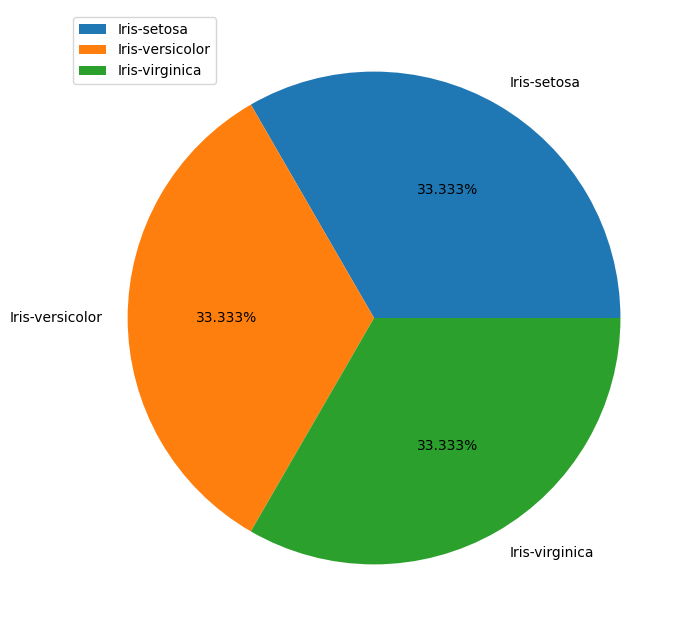

In [15]:
plt.figure(figsize=(8,8))
plt.pie(valuecount["count"],labels=["Iris-setosa","Iris-versicolor","Iris-virginica"],autopct="%1.3f%%",explode=[0,0,0])
plt.legend(loc="upper left")
plt.show()

In [17]:
data_frame_correlation=data_frame.drop(columns="species",axis=1)
data_frame_correlation

,sepal_length,sepal_width,petal_length,petal_width
0,5.100000,3.5000,1.400000,0.200000
1,5.861224,3.0000,1.400000,1.205369
2,4.700000,3.2000,1.300000,0.200000
3,4.600000,3.1000,1.500000,0.200000
4,5.000000,3.6000,1.400000,0.200000
...,...,...,...,...
145,6.700000,3.0000,3.733793,2.300000
146,6.300000,2.5000,3.733793,1.900000
147,6.500000,3.0625,5.200000,2.000000
148,6.200000,3.4000,5.400000,2.300000


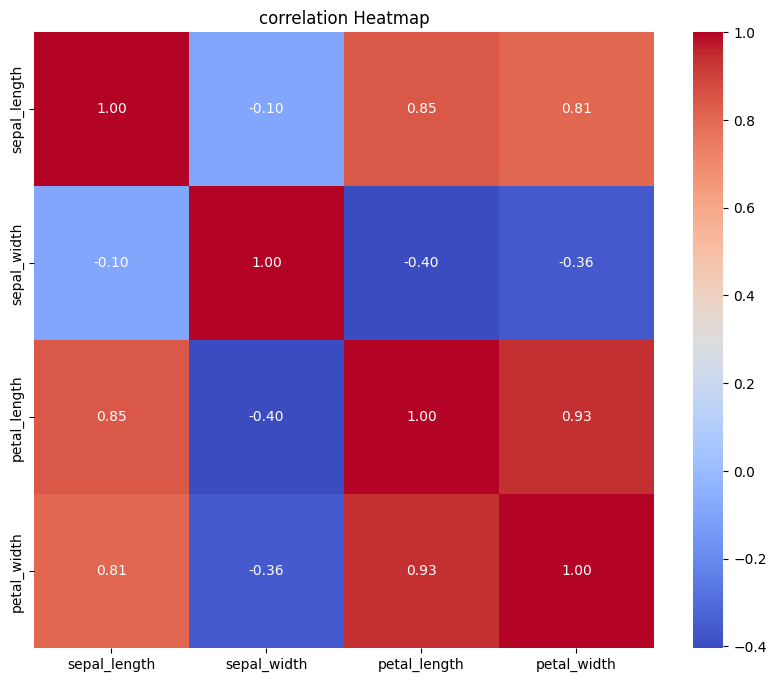

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(data_frame_correlation.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation Heatmap")
plt.show()

In [19]:
target="species"
X=data_frame.drop(columns=target) #Features
y=data_frame[target]              #target prediction

#split Data to Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


In [22]:
#Building Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=16)  #Max Iterations is the number of training times for model
model.fit(X_train,y_train)
accuracy_Logistic=model.score(X_test,y_test)
print("accuracy_test = ",accuracy_Logistic*100)
accuracy_train=model.score(X_train,y_train)
print("accuracy_train = ",accuracy_train*100)

accuracy_test =  95.55555555555556
accuracy_train =  95.23809523809523


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
#Building  Decision Tree Model
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_tree=DecisionTreeClassifier(max_depth=(4),random_state=(42))
model_tree.fit(X_train,y_train)
tree_depth=model_tree.max_depth
print("tree_depth = ",tree_depth)
accuracy_tree=model_tree.score(X_test,y_test)
print("accuracy_tree_test = ",accuracy_tree*100)
accuracy_tree_train=model_tree.score(X_train, y_train)
print("accuracy_tree_train =  ",accuracy_tree_train*100)

tree_depth =  4
accuracy_tree_test =  97.77777777777777
accuracy_tree_train =   99.04761904761905


In [24]:
from sklearn import tree
print(type(X_train.columns))
plt.figure(figsize=(100, 100))
tree.plot_tree(model_tree)
plt.show()

<class 'pandas.core.indexes.base.Index'>


In [25]:
#naive bayes model
# Initialize Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

# Train the classifier
naive_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
y_pred = naive_model.predict(X_test)

In [26]:
# Calculate accuracy
naive_accuracy = accuracy_score(y_test, y_pred)
print("Naive Accuracy:", naive_accuracy)
accuracy_naive= naive_model.score(X_test,y_test)

Naive Accuracy: 0.9333333333333333


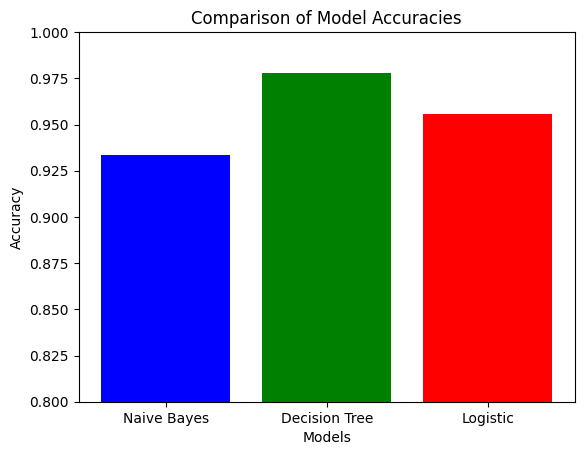

In [27]:
# Plotting
models = ['Naive Bayes', 'Decision Tree', 'Logistic']
accuracies = [accuracy_naive, accuracy_tree, accuracy_Logistic]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.8, 1.0)  # Limiting y-axis to better visualize differences
plt.show()